## VERİ ÖNİŞLEME
Bu haftanın ana konuları, eksik ve aykırı değerlerin tespiti ve işlenmesi, veri temizleme ve dönüştürme işlemleridir. Veri ön işleme, ham veriyi modelleme için uygun hale getirmeyi amaçlar. Bu işlemler, verinin daha anlaşılır, doğru ve analiz için hazır hale getirilmesini sağlar.
1. Veri Yükleme ve Keşif
2. Eksik Değerlerin Tespiti
3. Aykırı Değerlerin Tespiti



# Veri Ön İşleme Nedir?
**Tanım:** Ham verilerin daha kullanışlı ve analiz edilebilir hale getirilmesi.
**Neden Gerekli?:**
Gerçek dünya verileri eksik, gürültülü ve tutarsız olabilir.
Modelin doğruluğu ve performansı veri kalitesine bağlıdır.

# **Veri Ön İşleme Adımları**
* **Veri Yükleme ve Keşif**

Adım: Veriyi yüklemek ve anlamak.
Araçlar: Pandas (.head(), .info(), .describe() gibi fonksiyonlar).
Örnek Sorular:
Veride kaç satır ve sütun var?
Eksik veri var mı?
Hangi tür veri var (sayısal, kategorik, metin)
* **Eksik Veri İşleme**
Neden Önemli?: Eksik veri modellerde sorunlara yol açabilir.
Yöntemler:
Silme: Eksik değerli satırları veya sütunları kaldırmak.
Doldurma (Imputation):
Sayısal veriler için: Ortalamayla, medyanla veya regresyon yöntemleriyle doldurma.
Kategorik veriler için: Mod ile doldurma.
Araçlar: pandas.DataFrame.fillna(), SimpleImputer (scikit-learn).
* **Aykırı Değer Tespiti ve İşleme**
Neden Önemli?: Aykırı değerler modelin doğruluğunu düşürebilir.
Tespit Yöntemleri:
Görselleştirme: Boxplot, Histogram.
İstatistiksel Yöntemler: Z-Score, IQR (Interquartile Range).
İşleme:
Kaldırma.
Dönüştürme (log, sqrt gibi).
* **Veriyi Standartlaştırma ve Normalizasyon**
Tanım:
Standardizasyon: Verileri ortalamayı 0, standart sapmayı 1 yapacak şekilde ölçeklendirme.
Normalizasyon: Verileri 0-1 aralığına sıkıştırma.
** **Ne Zaman Kullanılır?:**
** Standardizasyon: Makine öğrenmesi modelleri (SVM, PCA gibi).
** Normalizasyon: K-Nearest Neighbors, Neural Networks.
** Araçlar: StandardScaler, MinMaxScaler (scikit-learn).
* **Kategorik Verilerin Kodlanması**
Yöntemler:
** Label Encoding (Küçük sayıda kategoriler için).
** One-Hot Encoding (Birden fazla kategoriler için).
** Ordinal Encoding (Sıralı kategoriler için).
** Araçlar: pandas.get_dummies(), OneHotEncoder (scikit-learn).
* **Veri Bölme**
** Neden Gerekli?: Eğitim, doğrulama ve test süreçleri için.
** Araçlar: train_test_split (scikit-learn).
** Bölme Oranları:
Eğitim: %70
Test: %30 (veya Eğitim: %60, Doğrulama: %20, Test: %20)


## Veri Yükleme ve Keşif



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# 1. Veri Yükleme
path = "/content/drive/MyDrive/KAIRU/Kurumsal/Acun Medya Eğitimi/datasets/titanic.csv"
data = pd.read_csv(path)



In [4]:
# 2. İlk 5 Satırı Görüntüleme
display("İlk 5 Satır:")
data.head()



'İlk 5 Satır:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
data.shape

(418, 12)

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# 3. Veri Setinin Genel Bilgileri
display("\nVeri Seti Bilgisi:")
data.info()




'\nVeri Seti Bilgisi:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
# 4. İstatistiksel Özellikler
display("\nİstatistiksel Özellikler (Sayısal Değişkenler):")
data.describe()



'\nİstatistiksel Özellikler (Sayısal Değişkenler):'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# 5. Eksik Veri Kontrolü
display("\nEksik Veri Sayısı:")
data.isnull().sum()



'\nEksik Veri Sayısı:'

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [11]:
data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


## 1. EKSİK DEĞERLERİN TESPİTİ VE DOLDURULMASI

Eksik değerler, veri analizinde sıkça karşılaşılan bir durumdur ve doğru bir şekilde ele alınmazsa model performansını düşürebilir. Eksik değerleri tespit etmek ve doldurmak, veri ön işleme adımlarının en önemli aşamalarından biridir.

#Eksik Değerleri Tespit Etme
Eksik değerleri tespit etmek için **isnull().sum()** fonksiyonunu kullanabilirsiniz. Bu fonksiyon, veri setindeki her sütun için eksik değer sayısını verir.

In [36]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Titanic veri setini yükleyelim
url = "/content/drive/MyDrive/KAIRU/Kurumsal/Acun Medya Eğitimi/datasets/titanic.csv"
data = pd.read_csv(url)

# Eksik veri analizi
print("Eksik veri sayısı:")
print(data.isnull().sum())






Eksik veri sayısı:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Eksik Değerleri Doldurma
Eksik değerleri doldurmak için, sütunun veri tipine ve analizdeki önemine göre farklı yöntemler kullanılabilir.

## SİLME

In [14]:

# Eksik veriye sahip sütunları silelim
data_dropped_columns = data.dropna(axis=1)
print("\nTüm eksik veriye sahip sütunları sildikten sonra:")
print(data_dropped_columns.isnull().sum())




Tüm eksik veriye sahip sütunları sildikten sonra:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64


In [23]:
data_dropped_cabin = data.drop(columns=["Cabin"]) #orjinal datasette cabin kalır. yeni df olan data_dropped_cabin 'de silinir.



In [25]:
data_dropped_cabin.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [29]:
data.drop(columns=["Cabin"], inplace=True) #orjinal df'de kalıcı olarak silinir




### Ortalama ile Doldurma (Sayısal Değişkenler):
Sayısal sütunlarda eksik değerleri sütunun ortalaması ile doldurmak yaygın bir yöntemdir. Bu yöntem özellikle simetrik dağılan verilerde etkilidir.

In [33]:
# 2. Eksik Veriyi Doldurma (Imputation)
# Sayısal bir sütun olan 'Age' için ortalama ile doldurma
data['Age_mean'] = data['Age'].fillna(data['Age'].mean())
print("\n'Ortalama' ile doldurulan 'Age' sütununun ilk 5 değeri:")
print(data[['Age', 'Age_mean']].head(11))


'Ortalama' ile doldurulan 'Age' sütununun ilk 5 değeri:
     Age  Age_mean
0   34.5  34.50000
1   47.0  47.00000
2   62.0  62.00000
3   27.0  27.00000
4   22.0  22.00000
5   14.0  14.00000
6   30.0  30.00000
7   26.0  26.00000
8   18.0  18.00000
9   21.0  21.00000
10   NaN  30.27259


 ## Eksik veriye sahip satırları silme
**Satır bazında silme (dropna):**
* Tüm eksik veriye sahip satırları kaldırır.
* Kalan veri azaldığı için bilgi kaybına yol açabilir.

In [34]:
# 1. Eksik Veriyi Silme
# Eksik veriye sahip satırları silelim çok tercih edilen bir yöntem değildir.
data_dropped_rows = data.dropna()
print("\nTüm eksik veriye sahip satırları sildikten sonra:")
print(data_dropped_rows.isnull().sum())


Tüm eksik veriye sahip satırları sildikten sonra:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_mean       0
dtype: int64


## Sütun bazında silme (dropna(axis=1))

* Cabin gibi yüksek oranda eksik veri içeren sütunları kaldırabilir.
* Önemli bilgileri kaybetme riski vardır.

## Medyan ile Doldurma:
Aşırı değerlerin bulunduğu **sayısal sütunlarda** medyan ile doldurma, ortalamaya göre daha sağlıklı sonuç verebilir.

In [37]:
# Sayısal sütun için medyan ile doldurma
data['Age_median'] = data['Age'].fillna(data['Age'].median())
print("\n'Medyan' ile doldurulan 'Age' sütununun ilk 5 değeri:")
print(data[['Age', 'Age_median']].head(11))



'Medyan' ile doldurulan 'Age' sütununun ilk 5 değeri:
     Age  Age_median
0   34.5        34.5
1   47.0        47.0
2   62.0        62.0
3   27.0        27.0
4   22.0        22.0
5   14.0        14.0
6   30.0        30.0
7   26.0        26.0
8   18.0        18.0
9   21.0        21.0
10   NaN        27.0


### Mod ile Doldurma (Kategorik Değişkenler):
**Kategorik sütunlarda **en sık görülen değeri (mod) kullanarak doldurma yapılabilir.

In [38]:
# Kategorik bir sütun olan 'Embarked' için mod ile doldurma
data['Cabin_mode'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
print("\n'Mod' ile doldurulan 'Cabin sütununun ilk 5 değeri:")
print(data[['Cabin', 'Cabin_mode']].head(30))


'Mod' ile doldurulan 'Cabin sütununun ilk 5 değeri:
              Cabin       Cabin_mode
0               NaN  B57 B59 B63 B66
1               NaN  B57 B59 B63 B66
2               NaN  B57 B59 B63 B66
3               NaN  B57 B59 B63 B66
4               NaN  B57 B59 B63 B66
5               NaN  B57 B59 B63 B66
6               NaN  B57 B59 B63 B66
7               NaN  B57 B59 B63 B66
8               NaN  B57 B59 B63 B66
9               NaN  B57 B59 B63 B66
10              NaN  B57 B59 B63 B66
11              NaN  B57 B59 B63 B66
12              B45              B45
13              NaN  B57 B59 B63 B66
14              E31              E31
15              NaN  B57 B59 B63 B66
16              NaN  B57 B59 B63 B66
17              NaN  B57 B59 B63 B66
18              NaN  B57 B59 B63 B66
19              NaN  B57 B59 B63 B66
20              NaN  B57 B59 B63 B66
21              NaN  B57 B59 B63 B66
22              NaN  B57 B59 B63 B66
23              NaN  B57 B59 B63 B66
24  B57 B59 B63 B66  B

In [39]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


## SimpleImputer ile Doldurma
Scikit-learn SimpleImputer, eksik değer doldurma işlemini daha sistematik bir şekilde gerçekleştirir.

In [41]:
# SimpleImputer ile Doldurma
# Sayısal sütunlar için (örneğin 'Age')
imputer = SimpleImputer(strategy='mean')
data['Age_imputed'] = imputer.fit_transform(data[['Age']])
print("\n'SimpleImputer' ile doldurulan 'Age' sütununun ilk 5 değeri:")
print(data[['Age', 'Age_imputed']].head(11))


'SimpleImputer' ile doldurulan 'Age' sütununun ilk 5 değeri:
     Age  Age_imputed
0   34.5     34.50000
1   47.0     47.00000
2   62.0     62.00000
3   27.0     27.00000
4   22.0     22.00000
5   14.0     14.00000
6   30.0     30.00000
7   26.0     26.00000
8   18.0     18.00000
9   21.0     21.00000
10   NaN     30.27259


## Hangi Yöntemi Seçmeliyiz?
**Eksik Veri Oranı Yüksekse:**

Sütun veya satırları silmek daha uygun olabilir. Örneğin, Cabin sütunu %77 oranında eksik olduğu için modelleme için kaldırılabilir.

**Eksik Veri Oranı Düşükse:**
Eksik verileri doldurmak, bilgi kaybını önler.
Örneğin:
Age sütunu için ortalama veya medyan kullanılabilir.
Cabin sütunu için mod ile doldurma tercih edilebilir.
Bu işlemler, eksik veri problemini çözerek modelleme aşamasında daha sağlam ve anlamlı sonuçlar elde etmenizi sağlar.

## 2. Aykırı Değerlerin Tespiti ve İşlenmesi
Aykırı değerler, veri setindeki diğer değerlere göre aşırı derecede farklı olan değerlerdir. Aykırı değerler, modelin doğruluğunu bozabilir ve bu nedenle ele alınmaları önemlidir.

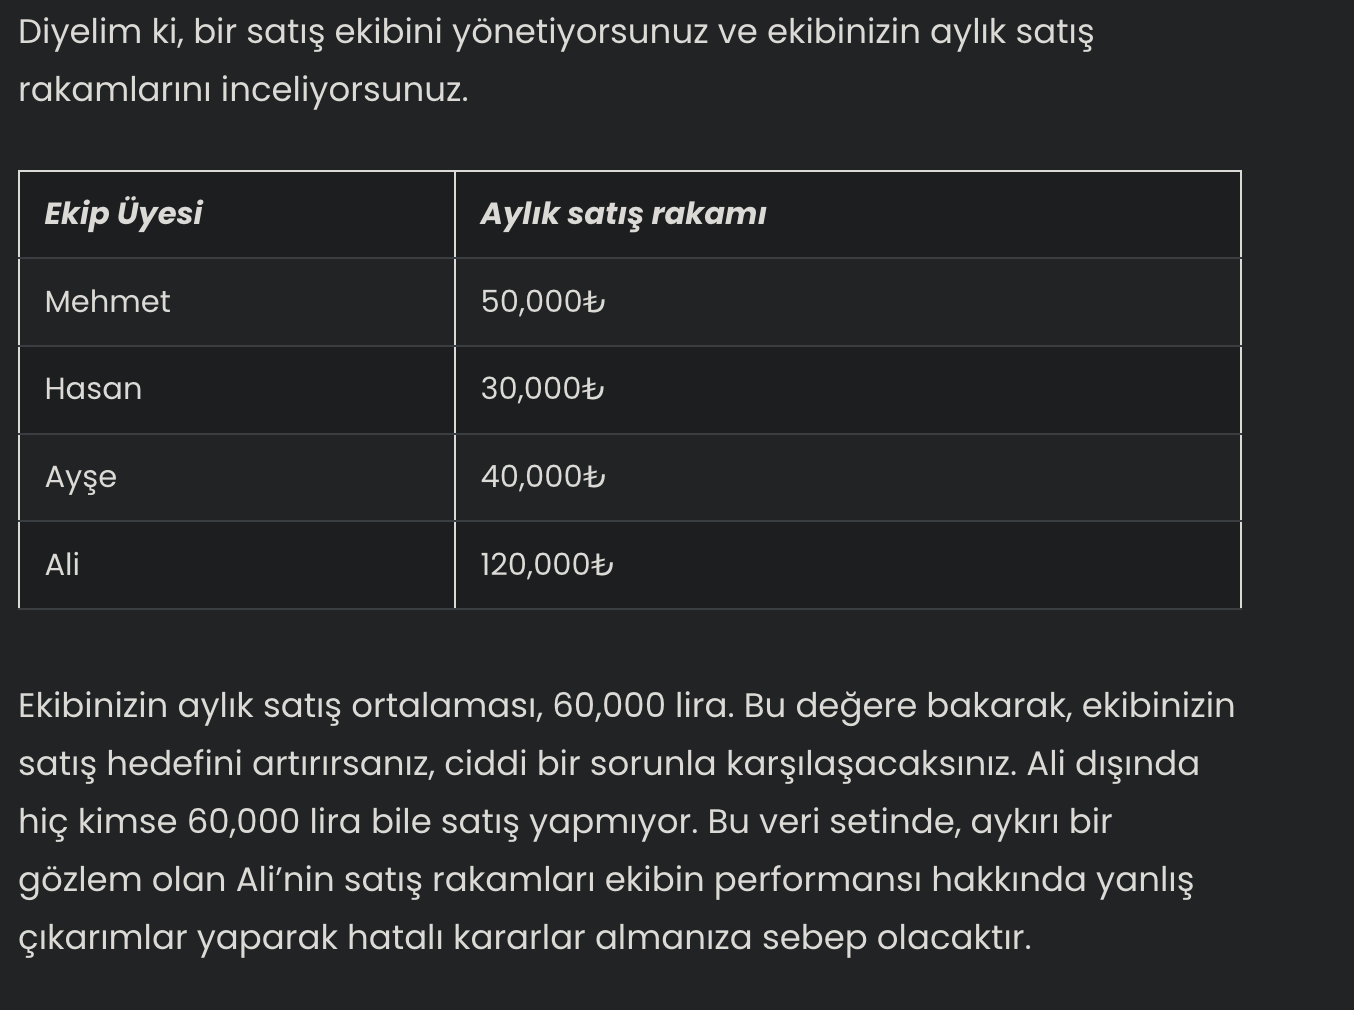

In [1]:
import numpy as np
import pandas as pd

# Örnek veri
veri = [10, 12, 13, 15, 15, 16, 17, 18, 19, 100]  # 100 açık bir aykırı değer gibi görünüyor

# Çeyrekleri hesapla
Q1 = np.percentile(veri, 25)  # 1. çeyrek (Q1)
Q3 = np.percentile(veri, 75)  # 3. çeyrek (Q3)

# IQR hesapla
IQR = Q3 - Q1

# Alt ve üst sınırları belirle
alt_sinir = Q1 - (1.5 * IQR)
ust_sinir = Q3 + (1.5 * IQR)

# Aykırı değerleri belirle
aykiri_degerler = [x for x in veri if x < alt_sinir or x > ust_sinir]

print(f"1. Çeyrek (Q1): {Q1}")
print(f"3. Çeyrek (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"Alt Sınır: {alt_sinir}")
print(f"Üst Sınır: {ust_sinir}")
print(f"Aykırı Değerler: {aykiri_degerler}")


1. Çeyrek (Q1): 13.5
3. Çeyrek (Q3): 17.75
IQR: 4.25
Alt Sınır: 7.125
Üst Sınır: 24.125
Aykırı Değerler: [100]




##Aykırı Değerleri Tespit Etme

Aykırı değerleri tespit etmek için en yaygın yöntemlerden biri IQR (Interquartile Range) yöntemidir. Bu yöntem, veriyi belirli bir aralıkta tutarak, aşırı uçları aykırı olarak işaretler.

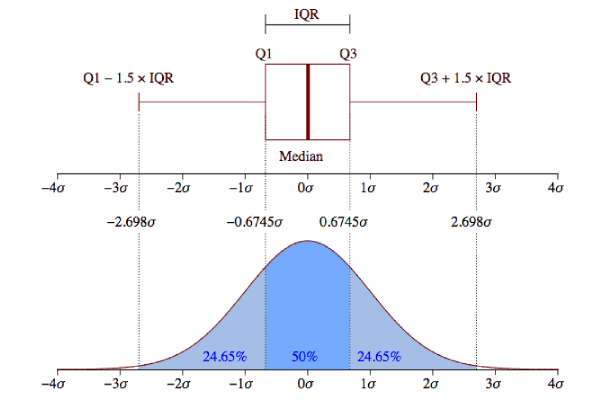


Bu görsel, bir veri setinin hem **kutu grafiği** (box plot) hem de **normal dağılım grafiği** ile nasıl görselleştirilebileceğini gösteriyor. Şimdi detaylı bir şekilde açıklayalım:

### 1. **Kutu Grafiği (Box Plot)**
- **Median (Ortanca):** Kutunun içinde kalın bir çizgiyle belirtilmiştir. Verinin ortanca değerini temsil eder.
- **Q1 (Birinci Çeyrek):** Kutunun sol sınırıdır. Verilerin %25’inin bu değerden daha küçük olduğu noktayı ifade eder.
- **Q3 (Üçüncü Çeyrek):** Kutunun sağ sınırıdır. Verilerin %75’inin bu değerden daha küçük olduğu noktayı ifade eder.
- **IQR (Interquartile Range):** Q3 ile Q1 arasındaki farktır (IQR = Q3 - Q1). Bu, verilerin ortadaki %50’sini kapsar.
- **Alt ve Üst Sınırlar (Q1 - 1.5 × IQR ve Q3 + 1.5 × IQR):** Bu sınırlar, aykırı değerleri belirlemek için kullanılır.
  - Q1 - 1.5 × IQR'in altında ya da Q3 + 1.5 × IQR'in üstünde kalan veriler **aykırı değer** olarak değerlendirilir.

### 2. **Normal Dağılım Grafiği**
- Bu grafik, bir veri setinin olasılık dağılımını gösterir. Verinin simetrik bir dağılıma sahip olduğunu varsayar.
- **Ortalama ve Standart Sapma (σ):**
  - Ortadaki çizgi (0σ), ortalama değeri gösterir.
  - -1σ ve 1σ arasında kalan alan, verinin %68’ini kapsar.
  - -2σ ve 2σ arasında kalan alan, verinin %95’ini kapsar.
  - -3σ ve 3σ arasında kalan alan, verinin %99.7’sini kapsar.
- Grafikteki **mavi alanlar**:
  - Ortada, verinin %50’sini kapsayan bölge (0 ile ±0.6745σ arası) Q1 ve Q3'ün arasına denk gelir.
  - Q1 ve Q3, normal dağılımda ±0.6745σ değerlerine karşılık gelir.

### 3. **Korelasyon**
- Kutu grafiği ve normal dağılımın bu birleşimi, veri setinin hem özet istatistiklerini (çeyrekler, medyan, IQR) hem de dağılım özelliklerini (simetri, çan eğrisi şekli) anlamaya olanak tanır.
- **Aykırı Değerler:** Normal dağılımda -2.698σ’nın altında ve 2.698σ’nın üstünde kalan değerler, kutu grafiğinde **Q1 - 1.5 × IQR** ve **Q3 + 1.5 × IQR** ile aynı mantıkla aykırı değer olarak sınıflandırılabilir.

Bu grafik, istatistiksel bir veri setinin hem dağılımını hem de özet istatistiklerini bir arada görselleştirmek için etkili bir yaklaşımdır.

# z skoru
Satış tablomuza geri dönelim
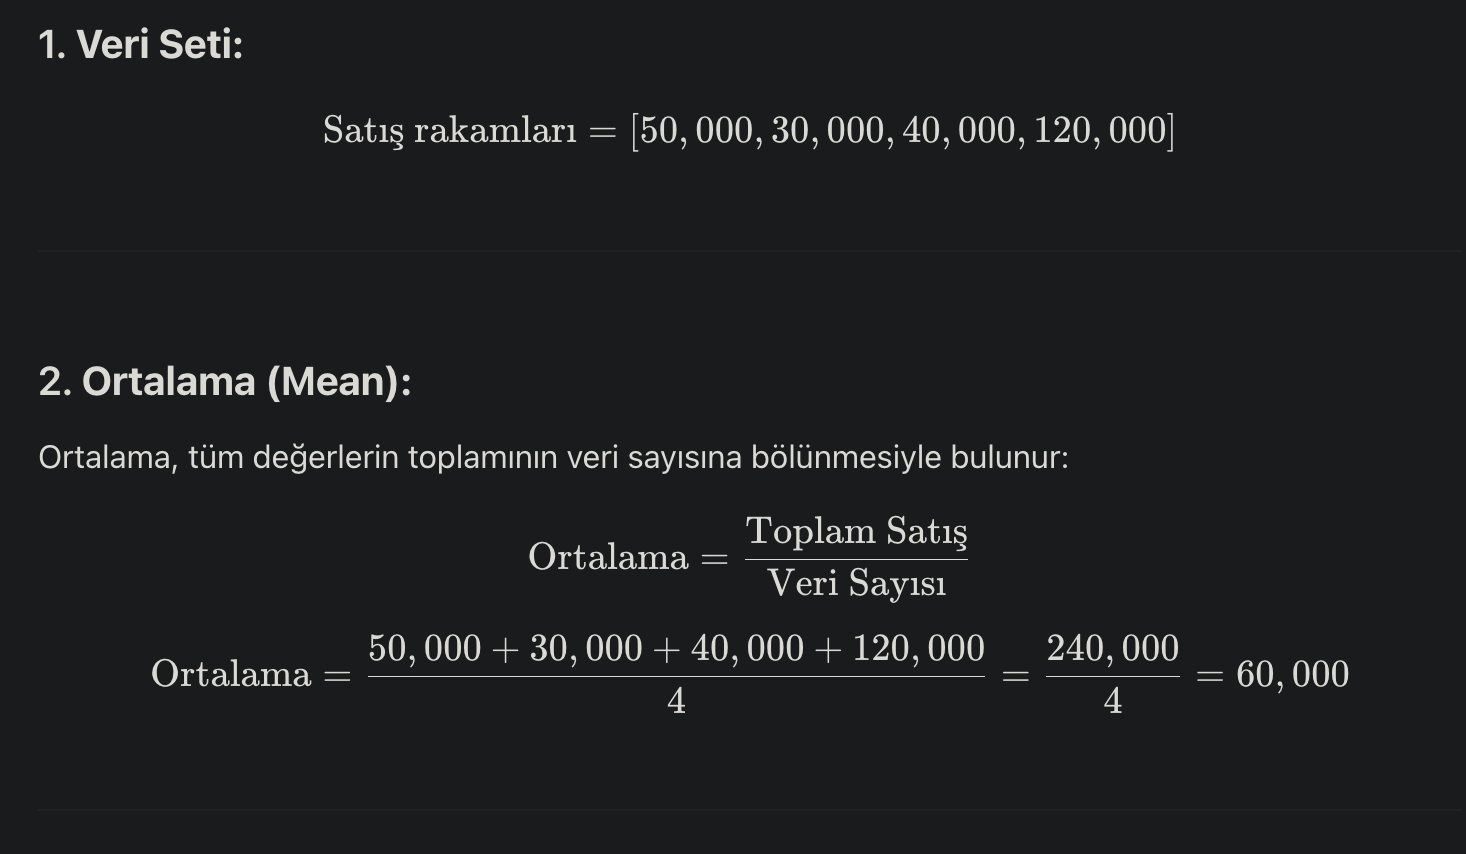

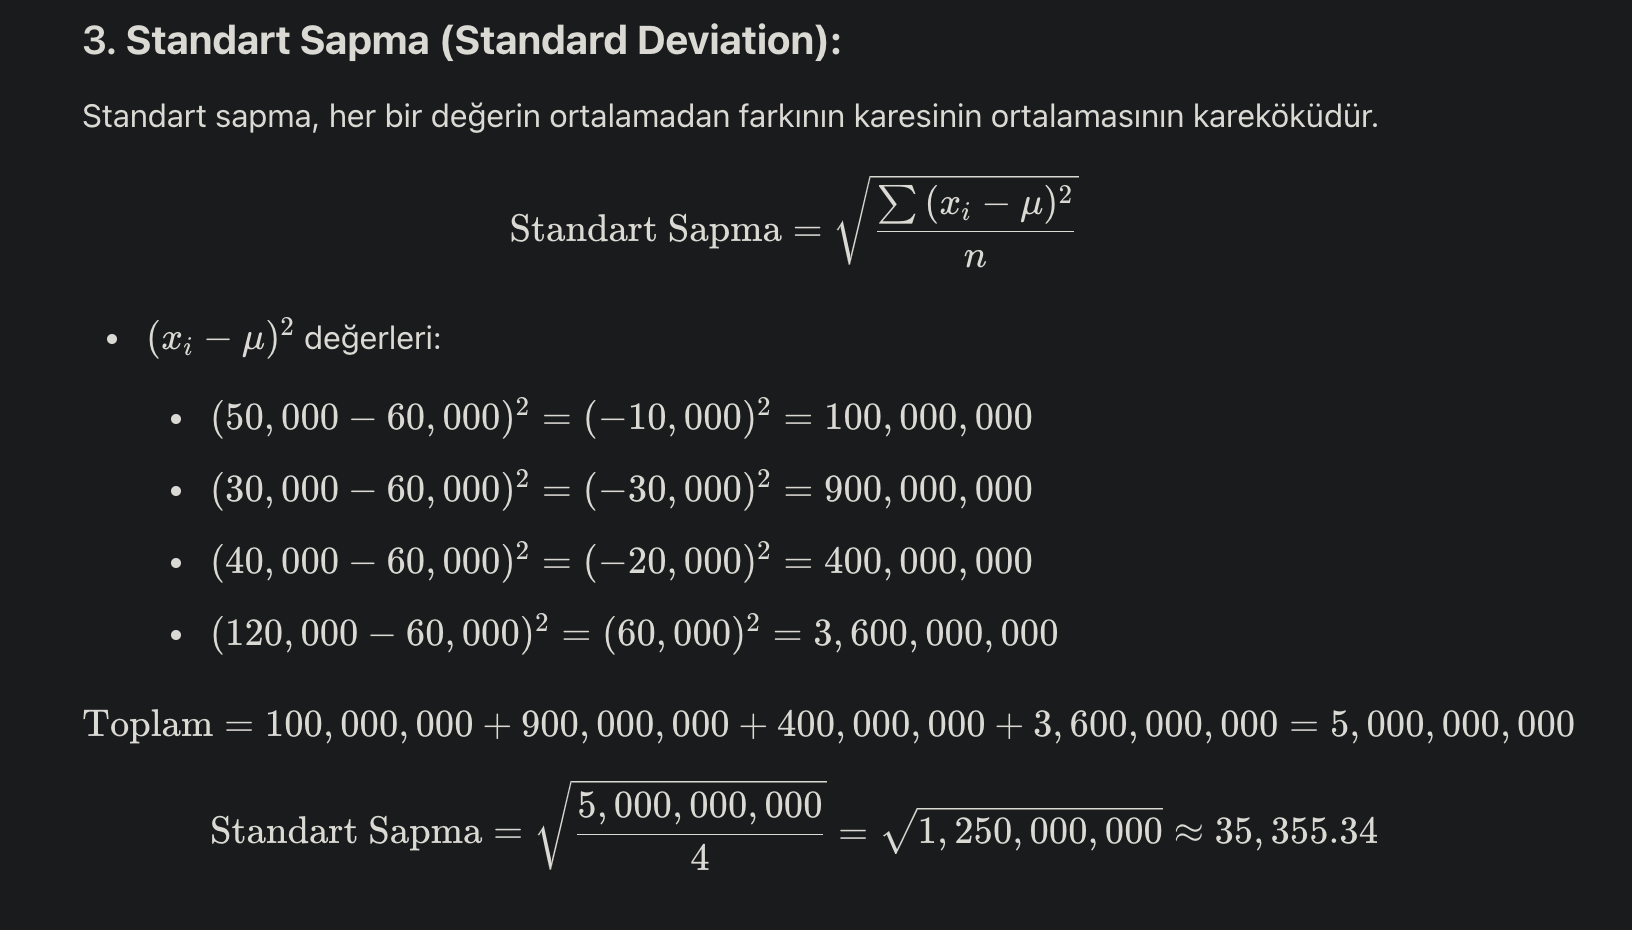





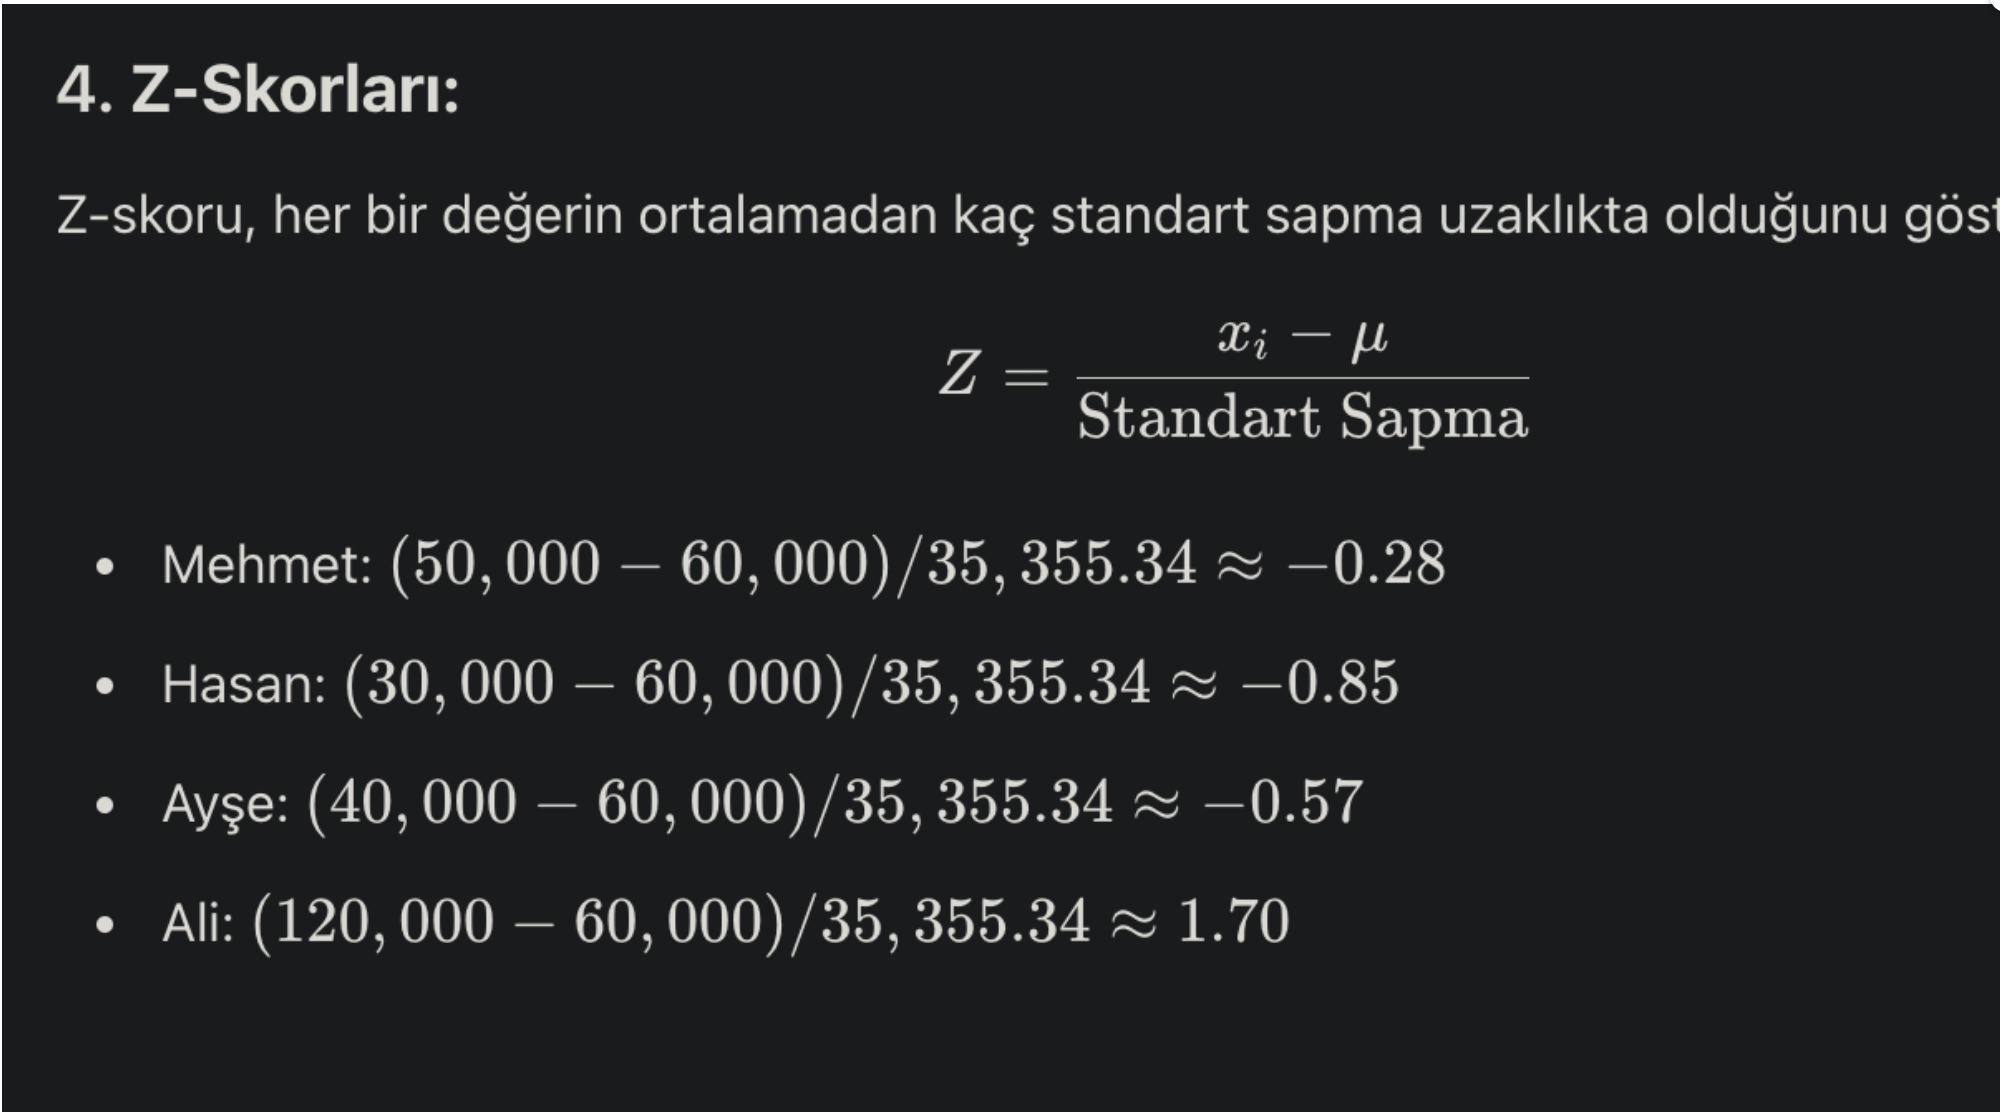

#INTERPOLASYON

Interpolasyon, **bir çeyrek pozisyonunun tam bir değeri ifade etmediği** (örneğin, 1.5, 2.75 gibi kesirli pozisyonlar) durumlarda gerekir. Kesirli pozisyon, verinin tam bir gözlem değeri değil, iki veri arasında bir noktada bulunduğunu gösterir. Bu durumda, interpolasyonla iki değerin arasındaki doğru ara değer hesaplanır.

---

### **Interpolasyonun Gerekip Gerekmediği Durumlar:**

#### **Interpolasyon Gerekmeyen Durumlar:**
- **Çeyrek pozisyonları tam bir sayı olduğunda, interpolasyona gerek yoktur.**
  - Pozisyon, veri setindeki sıralı bir gözlemin tam yerini gösterir.
  - Örneğin:
    - Pozisyon \( 1 \): Bu pozisyon 1. sıradaki değerdir.
    - Pozisyon \( 3 \): Bu pozisyon 3. sıradaki değerdir.

---

#### **Interpolasyon Gereken Durumlar:**
- **Çeyrek pozisyonları tam bir sayı olmadığında (kesirli pozisyon olduğunda), interpolasyona ihtiyaç vardır.**
  - Pozisyon, iki veri noktası arasındaki bir noktayı gösterir.
  - Bu durumda, çeyrek değeri bulmak için iki veri arasındaki oransal mesafe (lineer interpolasyon) hesaplanır.
  - Örneğin:
    - Pozisyon \( 1.5 \): Bu pozisyon 1. ve 2. değerler arasında bir noktadadır.

---

### **Örneğe Uygulama:**

Veri seti: \( [2, 4, 6, 8, 10] \)

#### **1. Q1 Pozisyonu:**
- Pozisyon: \( (n + 1) \ 0.25 = (5 + 1) \0.25 = 6 \ 0.25 = 1.5 \)
- **Kesirli pozisyon:** \( 1.5 \), 1. ve 2. değerler arasında bir noktadadır.
  - **Interpolasyon Gereklidir:**
  
    Q1 = {1. değer} + ({2. değer} - \{1. değer}) \ 0.5)
    Q1 = 2 + ((4 - 2) \ 0.5) = 2 + 1 = 3


#### **2. Q3 Pozisyonu:**
- Pozisyon: \( (n + 1) \ 0.75 = (5 + 1) \ 0.75 = 6 \ 0.75 = 4.5 \)
- **Kesirli pozisyon:** \( 4.5 \), 4. ve 5. değerler arasında bir noktadadır.
  - **Interpolasyon Gereklidir:**

    Q3 = {4. değer} + ({5. değer} - {4. değer}) \ 0.5

    Q3 = 8 + (10 - 8) \ 0.5 = 8 + 1 = 9


---

#### **Sonuçlar:**
- Interpolasyon, pozisyonlar kesirli olduğunda gereklidir çünkü bu, çeyrek değerin bir veri gözlemi yerine iki gözlem arasındaki bir noktada olduğunu gösterir.
- Eğer pozisyonlar tam bir sayı olsaydı (örneğin \( 1, 2, 3 \)), doğrudan ilgili değeri seçerdik ve interpolasyona gerek kalmazdı.

In [43]:
import numpy as np
import pandas as pd

# Sayısal bir örnek veri seti
data = {'Age': [22, 25, 27, 30, 35, 100]}  # 100 değeri aykırı olarak kabul edilebilir
df = pd.DataFrame(data)

# Aykırı değerleri belirlemek için IQR hesaplama
Q1 = df['Age'].quantile(0.25) #Q1 Pozisyonu=(n+1)×0.25
print(Q1)
Q3 = df['Age'].quantile(0.75)#Q3 Pozisyonu=(n+1)×0.75
print(Q3)
IQR = Q3 - Q1
print(IQR)

# Alt ve üst sınırları belirleme
lower_limit = Q1 - 1.5 * IQR
print("alt sınır",lower_limit)
upper_limit = Q3 + 1.5 * IQR
print("üst sınır",upper_limit)

# Aykırı değerleri tespit etme
outliers = df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]
print("Aykırı Değerler:\n", outliers)


25.5
33.75
8.25
alt sınır 13.125
üst sınır 46.125
Aykırı Değerler:
    Age
5  100



## UYGULAMA-1

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #veri görselleştirme kütüphanesi
from scipy.stats import zscore

# Titanic veri setini yükleyelim
url = "/content/drive/MyDrive/KAIRU/Kurumsal/Acun Medya Eğitimi/datasets/titanic.csv"
data = pd.read_csv(url)







In [45]:
# 1. Eksik Veri Analizi
print("Eksik Veri Analizi:")
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
print(pd.DataFrame({'Eksik Veri Sayısı': missing_data, 'Eksik Veri Yüzdesi (%)': missing_percentage}))

Eksik Veri Analizi:
             Eksik Veri Sayısı  Eksik Veri Yüzdesi (%)
PassengerId                  0                0.000000
Survived                     0                0.000000
Pclass                       0                0.000000
Name                         0                0.000000
Sex                          0                0.000000
Age                         86               20.574163
SibSp                        0                0.000000
Parch                        0                0.000000
Ticket                       0                0.000000
Fare                         1                0.239234
Cabin                      327               78.229665
Embarked                     0                0.000000


In [46]:
# Sadece sayısal sütunları seçelim
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("\nSayısal Sütunlar:")
print(numeric_columns)


Sayısal Sütunlar:
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')



--- PassengerId Sütunu ---


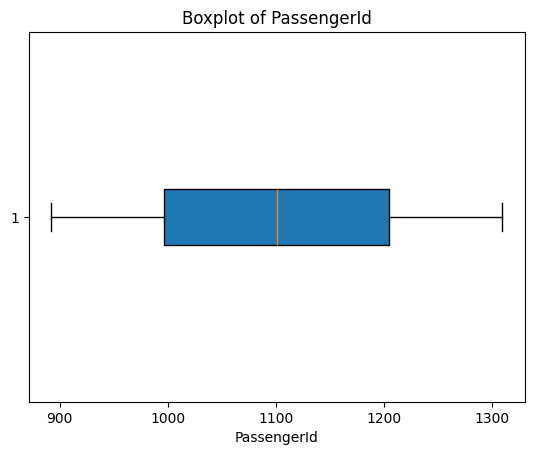

IQR: 208.5, Lower Bound: 683.5, Upper Bound: 1517.5
Aykırı Değer Sayısı: 0
Z-Score ile Aykırı Değer Sayısı: 0


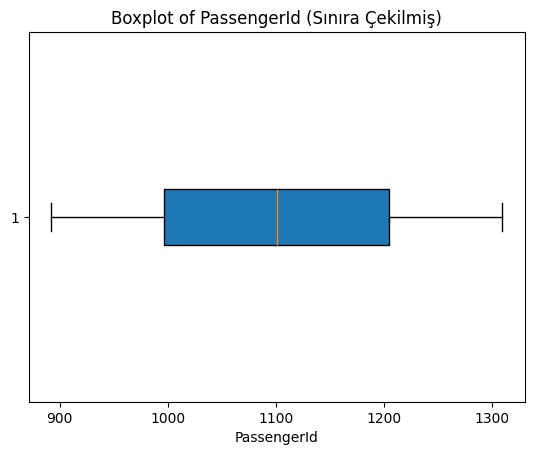


--- Survived Sütunu ---


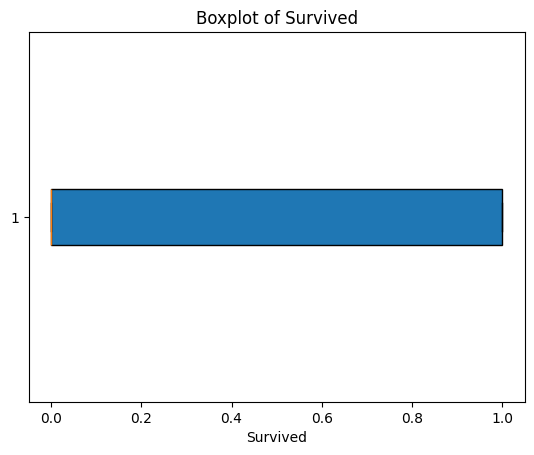

IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Aykırı Değer Sayısı: 0
Z-Score ile Aykırı Değer Sayısı: 0


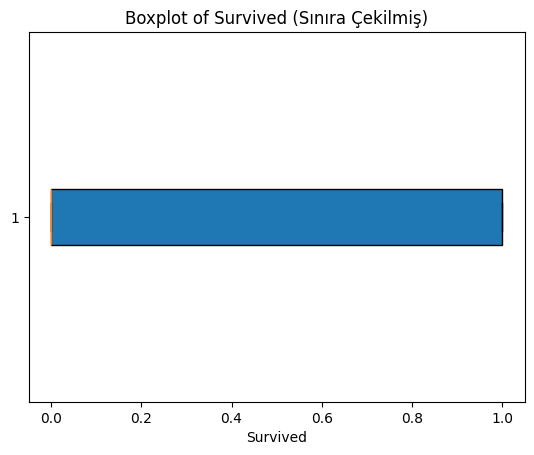


--- Pclass Sütunu ---


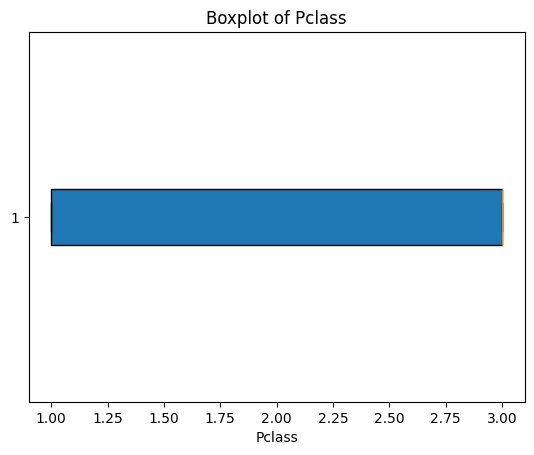

IQR: 2.0, Lower Bound: -2.0, Upper Bound: 6.0
Aykırı Değer Sayısı: 0
Z-Score ile Aykırı Değer Sayısı: 0


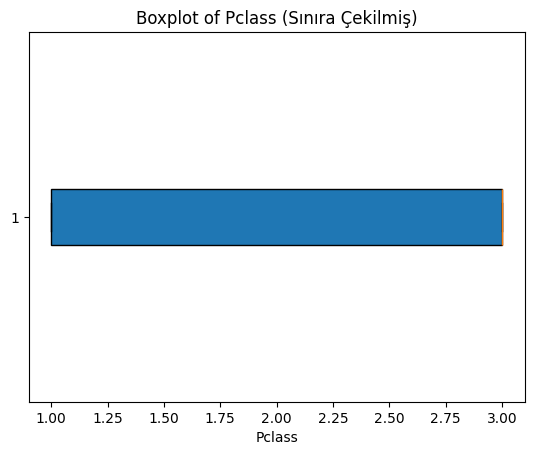


--- Age Sütunu ---
Age sütununda 86 eksik değer var. Dolduruluyor...


<ipython-input-47-383815827c5b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)  # Eksik değerleri sütunun ortalaması ile doldur


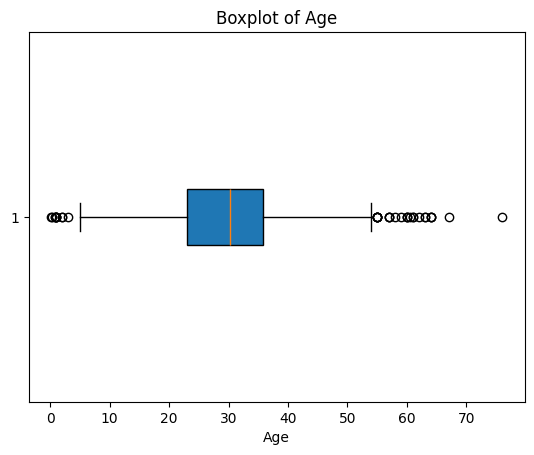

IQR: 12.75, Lower Bound: 3.875, Upper Bound: 54.875
Aykırı Değer Sayısı: 36
Z-Score ile Aykırı Değer Sayısı: 1


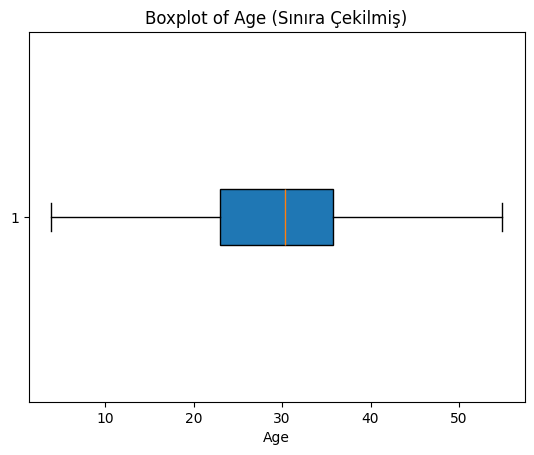


--- SibSp Sütunu ---


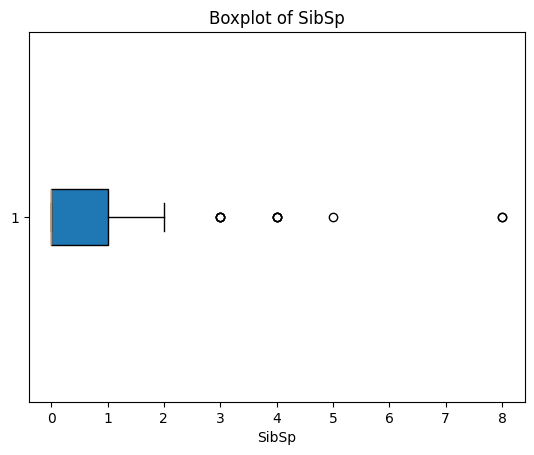

IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Aykırı Değer Sayısı: 11
Z-Score ile Aykırı Değer Sayısı: 7


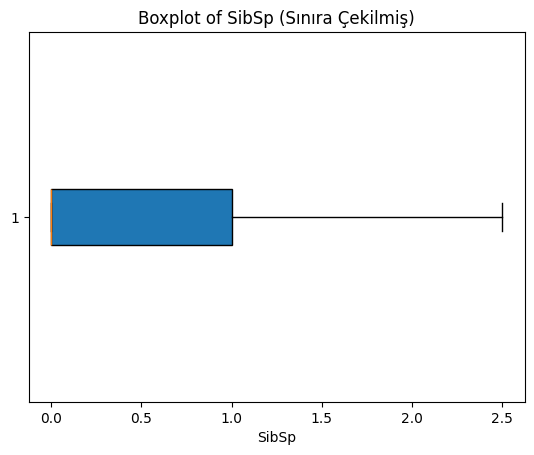


--- Parch Sütunu ---


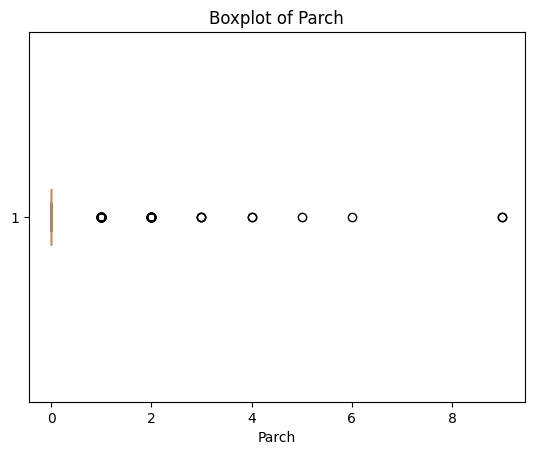

IQR: 0.0, Lower Bound: 0.0, Upper Bound: 0.0
Aykırı Değer Sayısı: 94
Z-Score ile Aykırı Değer Sayısı: 6


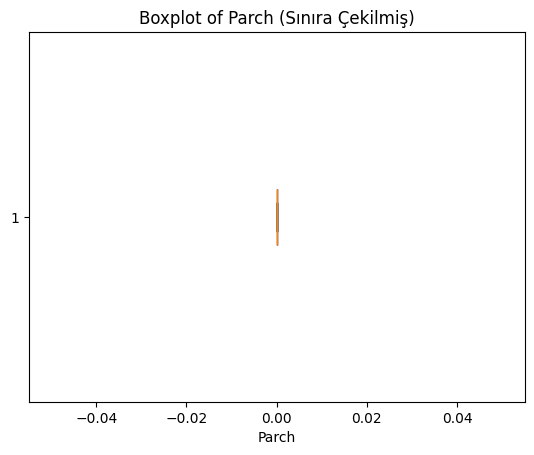


--- Fare Sütunu ---
Fare sütununda 1 eksik değer var. Dolduruluyor...


<ipython-input-47-383815827c5b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)  # Eksik değerleri sütunun ortalaması ile doldur


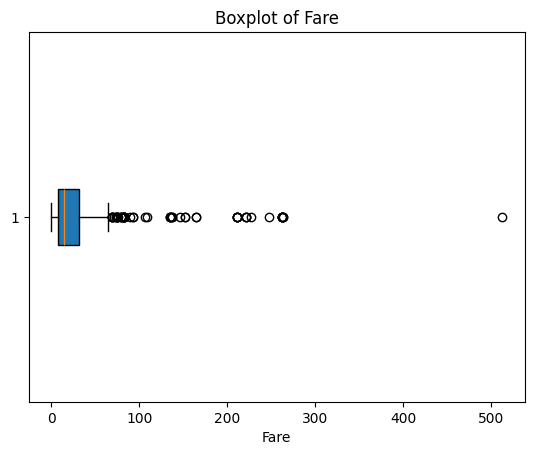

IQR: 23.6042, Lower Bound: -27.5105, Upper Bound: 66.9063
Aykırı Değer Sayısı: 55
Z-Score ile Aykırı Değer Sayısı: 18


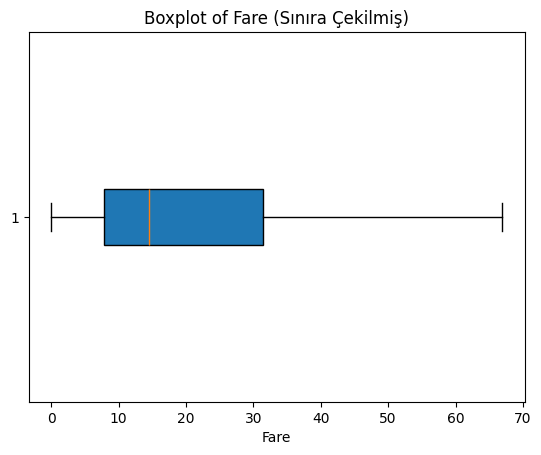

In [47]:


for col in numeric_columns:
    print(f"\n--- {col} Sütunu ---")

    # Eksik değer kontrolü ve doldurma
    if data[col].isnull().sum() > 0:
        print(f"{col} sütununda {data[col].isnull().sum()} eksik değer var. Dolduruluyor...")
        data[col].fillna(data[col].mean(), inplace=True)  # Eksik değerleri sütunun ortalaması ile doldur

    # Boxplot ile aykırı değerleri görselleştir
    plt.boxplot(data[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

    # IQR yöntemi ile aykırı değer analizi
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Aykırı Değer Sayısı: {len(outliers)}")

    # Z-Score yöntemi ile aykırı değer analizi
    z_scores = zscore(data[col])
    outliers_z = data[np.abs(z_scores) > 3]
    print(f"Z-Score ile Aykırı Değer Sayısı: {len(outliers_z)}")

    # Aykırı değerleri sınıra çek
    data[col] = data[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    # Sınıra çekilmiş veriyi tekrar görselleştir
    plt.boxplot(data[col].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col} (Sınıra Çekilmiş)")
    plt.xlabel(col)
    plt.show()


In [ ]:
data.columns

## Neden Sınıra Çekiyoruz?
* **Bilgi Kaybını Önlemek:** Aykırı değerleri tamamen kaldırmak yerine sınıra çekmek, veri setindeki bilgiyi korur.
* **Model Performansını Artırmak:** Aşırı büyük veya küçük değerlerin model üzerindeki olumsuz etkisini azaltır.
* **Gerçekçi Sınırlar Belirlemek:** Bilet ücreti gibi verilerin doğal sınırları vardır. Örneğin, Titanic için 65.64 üst sınırı daha makul bir değer temsil eder.

In [48]:
# Kategorik sütunları seçelim
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nKategorik Sütunlar:")
print(categorical_columns)


Kategorik Sütunlar:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [49]:


for col in categorical_columns:
    #print(f"\n--- {col} Sütunu ---")

    # Kategorik değişkenlerin benzersiz değerleri ve eksik veri analizi
    unique_values = data[col].unique()
    #print(f"Benzersiz Değerler: {unique_values}")
    #print(f"Eksik Veri Sayısı: {data[col].isnull().sum()}")

    # Eksik veriyi mod ile doldurma
    if data[col].isnull().sum() > 0:
        print(f"{col} sütunundaki eksik değerler mod ile dolduruluyor...")
        data[col].fillna(data[col].mode()[0], inplace=True)  # Eksik değerleri mod ile doldur
        print(f"Doldurulan değer: {data[col].mode()[0]}")

    # Kategorik değişkenlerin benzersiz değerlerini tekrar göster
    #updated_unique_values = data[col].unique()
    #print(f"Güncellenmiş Benzersiz Değerler: {updated_unique_values}")


Cabin sütunundaki eksik değerler mod ile dolduruluyor...
Doldurulan değer: B57 B59 B63 B66


<ipython-input-49-2a6edf15a092>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)  # Eksik değerleri mod ile doldur


In [50]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## ÖDEV: Heart Disease UCI Veri Seti Üzerinde Veri Analizi ve Makine Öğrenmesi Modeli

**Amaç:** Bu ödevde, Heart Disease UCI veri setini kullanarak veri ön işleme, veri analizi, aykırı değerlerin tespiti ve baskılanması, kategorik değişkenlerin sayısallaştırılması gibi adımları gerçekleştirecek ve sonunda basit bir makine öğrenmesi modeli oluşturacaksınız.

#### 1. Veri Setini Yükleyin
   - Heart Disease UCI veri setini indirin ve bir DataFrame olarak yükleyin.
   - Veri setinin boyutlarını, sütun isimlerini ve veri türlerini inceleyin.

#### 2. Veri Setinin Keşfi
   - **Veri Yapısını İnceleyin**: Veri setinin genel yapısına bakın; kaç gözlem ve değişken içerdiğini gözlemleyin.
   - **Özet İstatistikler**: Sayısal sütunların ortalama, standart sapma, min, max ve çeyrek değerlerini inceleyin.
   - **Eksik Değer Analizi**: Eksik veri olup olmadığını kontrol edin ve eksik değerleri nasıl işleyeceğinize karar verin.

#### 3. Aykırı Değer Analizi
   - **Box Plot ile Görselleştirme**: Her sayısal sütun için box plot çizerek aykırı değerleri görselleştirin.
   - **Aykırı Değerlerin Tespiti**: IQR yöntemiyle aykırı değerleri belirleyin. Q1 (1. çeyrek) ve Q3 (3. çeyrek) değerlerine göre alt ve üst sınırları hesaplayarak, bu sınırların dışında kalan verileri tespit edin.
   - **Aykırı Değerlerin İşlenmesi**: Aykırı değerleri alt ve üst sınırlarla değiştirerek baskılayın




## ÖDEV DATASET HİKAYESİ: Heart Disease UCI
**Açıklama:**
Heart Disease UCI veri seti, Cleveland Clinic Foundation tarafından toplanmış bir veri setidir ve **kalp hastalığı** teşhisini amaçlamaktadır. Veri seti, UCI Machine Learning Repository'de popüler bir veri seti olarak bulunmaktadır ve kalp hastalığı teşhisinde kullanılan çeşitli özellikleri içermektedir. Bu veri seti, 1988'de Robert Detrano ve meslektaşları tarafından geliştirilmiştir ve temel amacı, bir bireyin kalp hastalığına sahip olup olmadığını tahmin etmektir.

**Amaç:**
Bu veri setindeki özellikler kullanılarak bireylerin kalp hastalığı riski değerlendirilebilir. Çeşitli makine öğrenmesi ve istatistiksel modellerle, verilerden yola çıkarak kalp hastalığı tanısında önemli ipuçları bulunabilir. Araştırmacılar, veri setini kullanarak bireylerin kalp hastalığına sahip olma olasılığını tahmin eden modeller geliştirebilirler.



### Veri Setinin Kullanımı

Bu veri seti, kalp hastalığını teşhis etmeye yönelik çalışmalarda sıklıkla kullanılan bir veri setidir. Araştırmacılar ve veri bilimciler, bu veri setini kullanarak, hangi özelliklerin kalp hastalığını en çok etkilediğini belirlemeye çalışabilir. Örneğin, yaş, cinsiyet, kan basıncı, kolesterol seviyesi ve egzersiz sırasında anjina gibi faktörlerin kalp hastalığıyla olan ilişkisi analiz edilebilir.

Bu veri seti üzerinde yapılan çalışmalar, doktorlara ve sağlık profesyonellerine hastaların risk değerlendirmesi konusunda yardımcı olabilir. Ayrıca, geliştirilen makine öğrenmesi modelleri sayesinde, kalp hastalığı riskine sahip bireyler erken teşhis edilip uygun tedavi yöntemleri önerilebilir.

### Bu Ödevdeki Hedef

Bu ödevde, Heart Disease UCI veri setini kullanarak veri analizi ile bu süreçte, veri ön işleme, aykırı değer analizi gibi adımları öğreneceksiniz.

